# IMDB Movie Reviews Sentiment Analysis using Recurrent Neural Networks (RNN)

### Both Simple RNN and Long Short-term Memory will be tried here and their test performances will be compared with that of the baselined and other models created in notebooks in this folder. 

In [13]:
# Imports required packages

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,SimpleRNN, Dense

from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

import matplotlib.pyplot as plt

In [6]:
max_features = 10000    # count of most common words
embedding_dim = 100     # dimension of embedding
max_input_length = 500  # number of review words to into consideration

In [7]:
# Loads training and test data

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = max_input_length)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/home/pradip/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/home/pradip/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do

In [11]:
print("Train samples count:", x_train.shape[0],
      "\nTest samples count:", x_test.shape[0])

Train samples count: 25000 
Test samples count: 25000


In [14]:
# Pads reviews to be of same size

x_train = pad_sequences(x_train, maxlen = max_input_length)
x_test = pad_sequences(x_test, maxlen = max_input_length)

In [8]:
# Creates model

model = Sequential()
model.add(Embedding(max_features, embedding_dim, input_length = max_input_length))
model.add(SimpleRNN(32))
model.add(Dense(1, activation="sigmoid"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 100)          1000000   
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 32)                4256      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 1,004,289
Trainable params: 1,004,289
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Compiles the model

model.compile(optimizer = "rmsprop", loss = "binary_crossentropy", metrics = ["acc"])

In [15]:
# Fits the model

epochs = 10
batch_size = 32

history = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, validation_split = 0.2)

Epoch 1/10
625/625 [==============================] - 237s 378ms/step - loss: 0.6186 - acc: 0.6461 - val_loss: 0.6983 - val_acc: 0.6286
Epoch 2/10
625/625 [==============================] - 261s 417ms/step - loss: 0.5107 - acc: 0.7578 - val_loss: 0.4922 - val_acc: 0.7706
Epoch 3/10
625/625 [==============================] - 262s 419ms/step - loss: 0.4702 - acc: 0.7867 - val_loss: 0.4784 - val_acc: 0.7816
Epoch 4/10
625/625 [==============================] - 264s 422ms/step - loss: 0.4572 - acc: 0.7946 - val_loss: 0.4651 - val_acc: 0.7834
Epoch 5/10
625/625 [==============================] - 261s 418ms/step - loss: 0.4127 - acc: 0.8177 - val_loss: 0.4711 - val_acc: 0.7780
Epoch 6/10
625/625 [==============================] - 277s 444ms/step - loss: 0.4001 - acc: 0.8259 - val_loss: 0.4588 - val_acc: 0.7902
Epoch 7/10
625/625 [==============================] - 260s 417ms/step - loss: 0.3964 - acc: 0.8275 - val_loss: 0.4741 - val_acc: 0.7980
Epoch 8/10
625/625 [============================

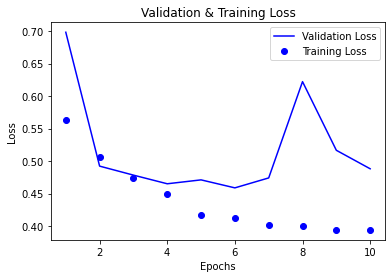

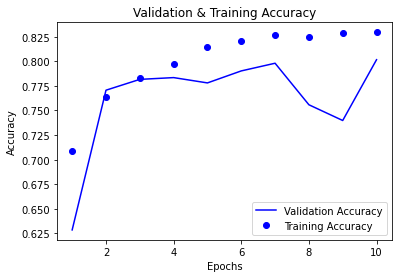

In [16]:
# Evaluates training and validation performance

history_dict = history.history

epoch_range = range(1, len(history_dict["acc"]) + 1)

train_losses = history_dict["loss"]
val_losses = history_dict["val_loss"]

train_accuracies = history_dict["acc"]
val_accuracies = history_dict["val_acc"]

plt.plot(epoch_range, val_losses, "b", label = "Validation Loss")
plt.plot(epoch_range, train_losses, "bo", label = "Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Validation & Training Loss")


plt.figure()

plt.plot(epoch_range, val_accuracies, "b", label = "Validation Accuracy")
plt.plot(epoch_range, train_accuracies, "bo", label = "Training Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Validation & Training Accuracy")

plt.show()

In [17]:
# Prints the validation performance

print("Validation Loss:", history_dict["val_loss"][-1],
      "\nValidation Accuracy:", history_dict["val_acc"][-1])

Validation Loss: 0.4881557524204254 
Validation Accuracy: 0.8015999794006348


In [18]:
# Prints the test performance

eval_result = model.evaluate(x_test, y_test)

print("Test Loss:", eval_result[0],
      "\nTest Accuracy:", eval_result[1])

782/782 [==============================] - 66s 84ms/step - loss: 0.4882 - acc: 0.7984
Test Loss: 0.4881662130355835 
Test Accuracy: 0.7983999848365784


### COMMENTS:

#### Test accuracy of this Simple RNN model is around 80% and it could not beat the 85% accuracy of the fully connected baselined model created previous notebook <em>1_IMDB_Movie_Review_Sentiment_Analysis_using_Densed_Neural_Network.ipynb</em> . Surprisingly, this model could not perform event better than the joinly learned word embeddings based model created in notebook <em>1_IMDB_Movie_Review_Sentiment_Analysis_using_Densed_Neural_Network.ipynb</em>.

#### There could be two reasons behind the fact that Simple RNN based model failed to outferform baselined model. First of all, only 500 review words were considered as input in the Simple RNN based model whereas Fully-connected model considered all the review words in the form of one-hot vector. Secondly, Simple RNN is not capable enough to remember long sequences, and hence we might need to try out Long Short-term Memory (LSTM) here.